In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [25]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Sprint Qualifying*

In [3]:
SpQuali = f1.get_session(2024, "Qatar", "Sprint Qualifying")
SpQuali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (417.41 MB) /home/soham32/.cache/fastf1


events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'


core           INFO 	Loading data for Qatar Grand Prix - Sprint Qualifying [v3.4.4]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['4', '63', '81', '55', '16', '1', '44', '10', '27', '30', '14', '23', '77', '18', '20', '11', '22', '31', '24', '43']


In [4]:
SpQuali.session_info

{'Meeting': {'Key': 1251,
  'Name': 'Qatar Grand Prix',
  'OfficialName': 'FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2024',
  'Location': 'Lusail',
  'Number': 23,
  'Country': {'Key': 149, 'Code': 'QAT', 'Name': 'Qatar'},
  'Circuit': {'Key': 150, 'ShortName': 'Lusail'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9650,
 'Type': 'Qualifying',
 'Name': 'Sprint Qualifying',
 'StartDate': datetime.datetime(2024, 11, 29, 20, 30),
 'EndDate': datetime.datetime(2024, 11, 29, 21, 14),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2024/2024-12-01_Qatar_Grand_Prix/2024-11-29_Sprint_Qualifying/'}

In [5]:
SpQuali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
63,RUS,Mercedes,NaN,2.0,NaT,
81,PIA,McLaren,NaN,3.0,NaT,
55,SAI,Ferrari,NaN,4.0,NaT,
16,LEC,Ferrari,NaN,5.0,NaT,
1,VER,Red Bull Racing,NaN,6.0,NaT,
44,HAM,Mercedes,NaN,7.0,NaT,
10,GAS,Alpine,NaN,8.0,NaT,
27,HUL,Haas F1 Team,NaN,9.0,NaT,
30,LAW,RB,NaN,10.0,NaT,


In [6]:
SpQuali_laps = SpQuali.laps
SpQuali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:14:54.587000,VER,1,NaT,1.0,1.0,0 days 00:13:21.343000,NaT,NaT,0 days 00:00:30.364000,...,True,Red Bull Racing,0 days 00:13:21.343000,2024-11-29 17:31:22.977,1,NaN,False,,False,False
1,0 days 00:16:17.878000,VER,1,0 days 00:01:23.291000,2.0,1.0,NaT,NaT,0 days 00:00:30.898000,0 days 00:00:28.094000,...,True,Red Bull Racing,0 days 00:14:54.587000,2024-11-29 17:32:56.221,1,NaN,False,,False,True
2,0 days 00:18:15.191000,VER,1,0 days 00:01:57.313000,3.0,1.0,NaT,NaT,0 days 00:00:49.089000,0 days 00:00:34.563000,...,True,Red Bull Racing,0 days 00:16:17.878000,2024-11-29 17:34:19.512,1,NaN,False,,False,True
3,0 days 00:19:37.771000,VER,1,0 days 00:01:22.580000,4.0,1.0,NaT,NaT,0 days 00:00:30.592000,0 days 00:00:27.906000,...,True,Red Bull Racing,0 days 00:18:15.191000,2024-11-29 17:36:16.825,1,NaN,False,,False,True
4,0 days 00:21:34.070000,VER,1,0 days 00:01:56.299000,5.0,1.0,NaT,NaT,0 days 00:00:49.020000,0 days 00:00:37.253000,...,True,Red Bull Racing,0 days 00:19:37.771000,2024-11-29 17:37:39.405,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0 days 00:51:20.551000,PIA,81,NaT,12.0,3.0,0 days 00:49:43.497000,NaT,NaT,0 days 00:00:34.291000,...,True,McLaren,0 days 00:41:26.518000,2024-11-29 17:59:28.152,1,NaN,False,,False,False
279,0 days 00:52:41.722000,PIA,81,0 days 00:01:21.171000,13.0,3.0,NaT,NaT,0 days 00:00:29.975000,0 days 00:00:27.371000,...,True,McLaren,0 days 00:51:20.551000,2024-11-29 18:09:22.185,1,NaN,False,,False,True
280,0 days 00:54:32.943000,PIA,81,0 days 00:01:51.221000,14.0,3.0,NaT,NaT,0 days 00:00:43.123000,0 days 00:00:38.317000,...,True,McLaren,0 days 00:52:41.722000,2024-11-29 18:10:43.356,1,NaN,False,,False,True
281,0 days 00:55:54.181000,PIA,81,0 days 00:01:21.238000,15.0,3.0,NaT,NaT,0 days 00:00:29.868000,0 days 00:00:27.500000,...,True,McLaren,0 days 00:54:32.943000,2024-11-29 18:12:34.577,1,NaN,True,TRACK LIMITS AT TURN 6 LAP 16,False,True


In [7]:
nor_SpQuali_laps = SpQuali.laps.pick_driver("NOR")
fastest_lap_nor_SpQuali = nor_SpQuali_laps.pick_fastest().LapTime
nor_SpQuali_lap_time = nor_SpQuali_laps["LapTime"]
nor_SpQuali_sec1 = nor_SpQuali_laps["Sector1Time"]
nor_SpQuali_sec2 = nor_SpQuali_laps["Sector2Time"]
nor_SpQuali_sec3 = nor_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_SpQuali), "which was in Lap number" ,nor_SpQuali_laps.pick_fastest().LapNumber)
nor_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.012000 which was in Lap number 14.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
21,NaT,NaT,0 days 00:00:30.327000,0 days 00:00:27.132000,221.0,266.0,280.0,96.0
22,0 days 00:01:22.785000,0 days 00:00:30.636000,0 days 00:00:27.838000,0 days 00:00:24.311000,247.0,288.0,279.0,319.0
23,0 days 00:02:00.402000,0 days 00:00:47.540000,0 days 00:00:39.685000,0 days 00:00:33.177000,135.0,191.0,279.0,131.0
24,0 days 00:01:22.021000,0 days 00:00:30.302000,0 days 00:00:27.683000,0 days 00:00:24.036000,247.0,287.0,280.0,321.0
25,0 days 00:01:54.274000,0 days 00:00:44.499000,0 days 00:00:38.623000,0 days 00:00:31.152000,179.0,226.0,279.0,153.0


In [8]:
fastest_lap_nor_SpQuali = nor_SpQuali_laps.pick_fastest()
tele_nor_SpQuali = fastest_lap_nor_SpQuali.get_telemetry().add_distance()
speed_nor_SpQuali = tele_nor_SpQuali.Speed
tele_nor_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,286,7,11470
3,287,7,11499
4,289,7,11557
5,291,7,11593
6,293,7,11629
...,...,...,...
600,277,7,11113
601,278,7,11191
602,282,7,11236
603,283,7,11304


In [9]:
rus_SpQuali_laps = SpQuali.laps.pick_driver("RUS")
fastest_lap_rus_SpQuali = rus_SpQuali_laps.pick_fastest().LapTime
rus_SpQuali_lap_time = rus_SpQuali_laps["LapTime"]
rus_SpQuali_sec1 = rus_SpQuali_laps["Sector1Time"]
rus_SpQuali_sec2 = rus_SpQuali_laps["Sector2Time"]
rus_SpQuali_sec3 = rus_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_SpQuali), "which was in Lap number" ,rus_SpQuali_laps.pick_fastest().LapNumber)
rus_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.075000 which was in Lap number 15.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
238,NaT,NaT,0 days 00:00:31.678000,0 days 00:00:30.434000,219.0,266.0,283.0,161.0
239,0 days 00:01:22.811000,0 days 00:00:30.728000,0 days 00:00:27.856000,0 days 00:00:24.227000,246.0,291.0,281.0,319.0
240,0 days 00:02:09.048000,0 days 00:00:57.442000,0 days 00:00:37.475000,0 days 00:00:34.131000,181.0,214.0,282.0,80.0
241,0 days 00:01:22.021000,0 days 00:00:30.397000,0 days 00:00:27.662000,0 days 00:00:23.962000,249.0,290.0,283.0,322.0
242,0 days 00:02:19.434000,0 days 00:00:55.595000,0 days 00:00:37.834000,0 days 00:00:46.005000,195.0,191.0,283.0,84.0


In [10]:
fastest_lap_rus_SpQuali = rus_SpQuali_laps.pick_fastest()
tele_rus_SpQuali = fastest_lap_rus_SpQuali.get_telemetry().add_distance()
speed_rus_SpQuali = tele_rus_SpQuali.Speed
tele_rus_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,286,7,11598
3,287,7,11484
4,288,7,11256
5,290,7,11028
6,292,8,10451
...,...,...,...
594,280,7,11617
595,281,7,11714
596,281,7,11555
597,285,7,10967


In [11]:
sai_SpQuali_laps = SpQuali.laps.pick_driver("SAI")
fastest_lap_sai_SpQuali = sai_SpQuali_laps.pick_fastest().LapTime
sai_SpQuali_lap_time = sai_SpQuali_laps["LapTime"]
sai_SpQuali_sec1 = sai_SpQuali_laps["Sector1Time"]
sai_SpQuali_sec2 = sai_SpQuali_laps["Sector2Time"]
sai_SpQuali_sec3 = sai_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_SpQuali), "which was in Lap number" ,sai_SpQuali_laps.pick_fastest().LapNumber)
sai_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.281000 which was in Lap number 18.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
219,NaT,NaT,0 days 00:00:31.175000,0 days 00:00:32.951000,220.0,263.0,280.0,86.0
220,0 days 00:01:23.543000,0 days 00:00:30.997000,0 days 00:00:28.140000,0 days 00:00:24.406000,247.0,288.0,278.0,318.0
221,0 days 00:02:05.588000,0 days 00:00:51.555000,0 days 00:00:36.659000,0 days 00:00:37.374000,75.0,230.0,281.0,133.0
222,0 days 00:01:22.261000,0 days 00:00:30.296000,0 days 00:00:27.877000,0 days 00:00:24.088000,250.0,288.0,275.0,321.0
223,0 days 00:02:00.430000,0 days 00:00:46.150000,0 days 00:00:38.316000,0 days 00:00:35.964000,135.0,225.0,210.0,152.0


In [12]:
fastest_lap_sai_SpQuali = sai_SpQuali_laps.pick_fastest()
tele_sai_SpQuali = fastest_lap_sai_SpQuali.get_telemetry().add_distance()
speed_sai_SpQuali = tele_sai_SpQuali.Speed
tele_sai_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,286,7,11470
3,287,7,11512
4,290,7,11595
5,292,7,11662
6,292,7,11475
...,...,...,...
603,278,7,11107
604,279,7,11185
605,281,7,11264
606,282,7,11318


In [13]:
ver_SpQuali_laps = SpQuali.laps.pick_driver("VER")
fastest_lap_ver_SpQuali = ver_SpQuali_laps.pick_fastest().LapTime
ver_SpQuali_lap_time = ver_SpQuali_laps["LapTime"]
ver_SpQuali_sec1 = ver_SpQuali_laps["Sector1Time"]
ver_SpQuali_sec2 = ver_SpQuali_laps["Sector2Time"]
ver_SpQuali_sec3 = ver_SpQuali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_SpQuali), "which was in Lap number" ,ver_SpQuali_laps.pick_fastest().LapNumber)
ver_SpQuali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.315000 which was in Lap number 18.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:30.364000,0 days 00:00:26.476000,232.0,279.0,281.0,125.0
1,0 days 00:01:23.291000,0 days 00:00:30.898000,0 days 00:00:28.094000,0 days 00:00:24.299000,245.0,289.0,280.0,321.0
2,0 days 00:01:57.313000,0 days 00:00:49.089000,0 days 00:00:34.563000,0 days 00:00:33.661000,201.0,137.0,282.0,160.0
3,0 days 00:01:22.580000,0 days 00:00:30.592000,0 days 00:00:27.906000,0 days 00:00:24.082000,248.0,290.0,281.0,325.0
4,0 days 00:01:56.299000,0 days 00:00:49.020000,0 days 00:00:37.253000,0 days 00:00:30.026000,185.0,260.0,253.0,189.0


In [14]:
fastest_lap_ver_SpQuali = ver_SpQuali_laps.pick_fastest()
tele_ver_SpQuali = fastest_lap_ver_SpQuali.get_telemetry().add_distance()
speed_ver_SpQuali = tele_ver_SpQuali.Speed
tele_ver_SpQuali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,287,7,11423
3,289,7,11471
4,290,7,11478
5,291,7,11485
6,293,7,11381
...,...,...,...
607,275,7,10966
608,277,7,11011
609,278,7,11035
610,280,7,11060


In [15]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_SpQuali_sec1),
        "Sector1Time": nor_SpQuali_sec1,
        "Sector2Time": nor_SpQuali_sec2,
        "Sector3Time": nor_SpQuali_sec3,
        "Lap Time": nor_SpQuali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_SpQuali_sec1),
        "Sector1Time": rus_SpQuali_sec1,
        "Sector2Time": rus_SpQuali_sec2,
        "Sector3Time": rus_SpQuali_sec3,
        "Lap Time": rus_SpQuali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_SpQuali_sec1),
        "Sector1Time": sai_SpQuali_sec1,
        "Sector2Time": sai_SpQuali_sec2,
        "Sector3Time": sai_SpQuali_sec3,
        "Lap Time": sai_SpQuali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_SpQuali_sec1),
        "Sector1Time": ver_SpQuali_sec1,
        "Sector2Time": ver_SpQuali_sec2,
        "Sector3Time": ver_SpQuali_sec3,
        "Lap Time": ver_SpQuali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Lando Norris,0 days 00:00:30.636000,0 days 00:00:27.838000,0 days 00:00:24.311000,0 days 00:01:22.785000
2,Lando Norris,0 days 00:00:47.540000,0 days 00:00:39.685000,0 days 00:00:33.177000,0 days 00:02:00.402000
3,Lando Norris,0 days 00:00:30.302000,0 days 00:00:27.683000,0 days 00:00:24.036000,0 days 00:01:22.021000
4,Lando Norris,0 days 00:00:44.499000,0 days 00:00:38.623000,0 days 00:00:31.152000,0 days 00:01:54.274000
5,Lando Norris,0 days 00:00:29.989000,0 days 00:00:27.474000,0 days 00:00:23.893000,0 days 00:01:21.356000
6,Lando Norris,0 days 00:00:37.784000,0 days 00:00:33.490000,0 days 00:00:35.774000,0 days 00:01:47.048000
8,Lando Norris,0 days 00:00:30.461000,0 days 00:00:27.787000,0 days 00:00:23.925000,0 days 00:01:22.173000
9,Lando Norris,0 days 00:00:40.694000,0 days 00:00:39.709000,0 days 00:00:29.350000,0 days 00:01:49.753000
10,Lando Norris,0 days 00:00:30.058000,0 days 00:00:27.355000,0 days 00:00:23.818000,0 days 00:01:21.231000
11,Lando Norris,0 days 00:00:35.775000,0 days 00:00:33.706000,0 days 00:00:33.733000,0 days 00:01:43.214000


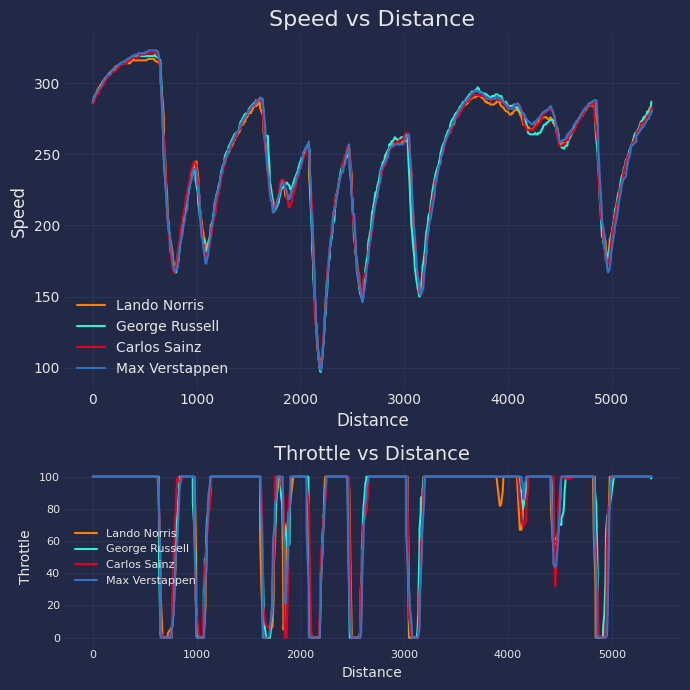

In [16]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = SpQuali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_nor_SpQuali.Distance, tele_nor_SpQuali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_rus_SpQuali.Distance, tele_rus_SpQuali.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_sai_SpQuali.Distance, tele_sai_SpQuali.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_nor_SpQuali.Distance, tele_nor_SpQuali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_rus_SpQuali.Distance, tele_rus_SpQuali.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_sai_SpQuali.Distance, tele_sai_SpQuali.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_ver_SpQuali.Distance, tele_ver_SpQuali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


*Sprint Race*

In [17]:
sprint = f1.get_session(2024, "Qatar", "Sprint")
sprint.load()

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'


core           INFO 	Loading data for Qatar Grand Prix - Sprint [v3.4.4]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for lap_count


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '55', '16', '44', '27', '1', '10', '20', '14', '77', '18', '31', '23', '30', '22', '43', '24', '11']


In [18]:
sprint.session_info

{'Meeting': {'Key': 1251,
  'Name': 'Qatar Grand Prix',
  'OfficialName': 'FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2024',
  'Location': 'Lusail',
  'Number': 23,
  'Country': {'Key': 149, 'Code': 'QAT', 'Name': 'Qatar'},
  'Circuit': {'Key': 150, 'ShortName': 'Lusail'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9654,
 'Type': 'Race',
 'Name': 'Sprint',
 'StartDate': datetime.datetime(2024, 11, 30, 17, 0),
 'EndDate': datetime.datetime(2024, 11, 30, 18, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2024/2024-12-01_Qatar_Grand_Prix/2024-11-30_Sprint/'}

In [19]:
sprint.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,3.0,1.0,0 days 00:27:03.010000,Finished
4,NOR,McLaren,1.0,2.0,0 days 00:00:00.136000,Finished
63,RUS,Mercedes,2.0,3.0,0 days 00:00:00.410000,Finished
55,SAI,Ferrari,4.0,4.0,0 days 00:00:01.326000,Finished
16,LEC,Ferrari,5.0,5.0,0 days 00:00:05.073000,Finished
44,HAM,Mercedes,7.0,6.0,0 days 00:00:05.650000,Finished
27,HUL,Haas F1 Team,9.0,7.0,0 days 00:00:08.508000,Finished
1,VER,Red Bull Racing,6.0,8.0,0 days 00:00:10.368000,Finished
10,GAS,Alpine,8.0,9.0,0 days 00:00:14.513000,Finished
20,MAG,Haas F1 Team,15.0,10.0,0 days 00:00:15.485000,Finished


In [20]:
sprint_laps = sprint.laps
sprint_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:45:42.297000,PIA,81,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.338000,...,False,McLaren,0 days 00:44:13.204000,2024-11-30 14:03:27.543,1,2.0,False,,False,False
1,0 days 00:47:08.279000,PIA,81,0 days 00:01:25.982000,2.0,1.0,NaT,NaT,0 days 00:00:32.133000,0 days 00:00:29.102000,...,False,McLaren,0 days 00:45:42.297000,2024-11-30 14:04:56.636,1,2.0,False,,False,True
2,0 days 00:48:34.169000,PIA,81,0 days 00:01:25.890000,3.0,1.0,NaT,NaT,0 days 00:00:31.966000,0 days 00:00:29.017000,...,False,McLaren,0 days 00:47:08.279000,2024-11-30 14:06:22.618,1,2.0,False,,False,True
3,0 days 00:50:00.287000,PIA,81,0 days 00:01:26.118000,4.0,1.0,NaT,NaT,0 days 00:00:32.071000,0 days 00:00:29.148000,...,False,McLaren,0 days 00:48:34.169000,2024-11-30 14:07:48.508,1,2.0,False,,False,True
4,0 days 00:51:26.444000,PIA,81,0 days 00:01:26.157000,5.0,1.0,NaT,NaT,0 days 00:00:31.891000,0 days 00:00:29.289000,...,False,McLaren,0 days 00:50:00.287000,2024-11-30 14:09:14.626,1,2.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0 days 01:06:46.858000,PER,11,0 days 00:01:57.922000,15.0,2.0,0 days 01:05:23.114000,NaT,0 days 00:01:03.716000,0 days 00:00:29.353000,...,False,Red Bull Racing,0 days 01:04:48.936000,2024-11-30 14:24:03.275,1,20.0,False,,False,False
376,0 days 01:08:15.988000,PER,11,0 days 00:01:29.130000,16.0,2.0,NaT,NaT,0 days 00:00:31.933000,0 days 00:00:29.134000,...,False,Red Bull Racing,0 days 01:06:46.858000,2024-11-30 14:26:01.197,1,20.0,False,,False,True
377,0 days 01:09:41.078000,PER,11,0 days 00:01:25.090000,17.0,2.0,NaT,NaT,0 days 00:00:31.634000,0 days 00:00:28.854000,...,False,Red Bull Racing,0 days 01:08:15.988000,2024-11-30 14:27:30.327,1,20.0,False,,False,True
378,0 days 01:11:05.970000,PER,11,0 days 00:01:24.892000,18.0,2.0,NaT,NaT,0 days 00:00:31.567000,0 days 00:00:28.803000,...,False,Red Bull Racing,0 days 01:09:41.078000,2024-11-30 14:28:55.417,1,20.0,False,,False,True


In [21]:
pia_sprint_laps = sprint.laps.pick_driver("PIA")
fastest_lap_pia_sprint = pia_sprint_laps.pick_fastest().LapTime
pia_sprint_lap_time = pia_sprint_laps["LapTime"]
pia_sprint_sec1 = pia_sprint_laps["Sector1Time"]
pia_sprint_sec2 = pia_sprint_laps["Sector2Time"]
pia_sprint_sec3 = pia_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_sprint), "which was in Lap number" ,pia_sprint_laps.pick_fastest().LapNumber)
pia_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:24.494000 which was in Lap number 17.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:29.338000,0 days 00:00:25.369000,231.0,283.0,273.0,243.0
1,0 days 00:01:25.982000,0 days 00:00:32.133000,0 days 00:00:29.102000,0 days 00:00:24.747000,239.0,284.0,278.0,294.0
2,0 days 00:01:25.890000,0 days 00:00:31.966000,0 days 00:00:29.017000,0 days 00:00:24.907000,237.0,285.0,274.0,296.0
3,0 days 00:01:26.118000,0 days 00:00:32.071000,0 days 00:00:29.148000,0 days 00:00:24.899000,238.0,285.0,278.0,NaN
4,0 days 00:01:26.157000,0 days 00:00:31.891000,0 days 00:00:29.289000,0 days 00:00:24.977000,NaN,285.0,279.0,316.0


In [22]:
fastest_lap_pia_sprint = pia_sprint_laps.pick_fastest()
tele_pia_sprint = fastest_lap_pia_sprint.get_telemetry().add_distance()
speed_pia_sprint = tele_pia_sprint.Speed
tele_pia_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,283,7,11372
3,284,7,11394
4,285,7,11438
5,287,7,11501
6,290,7,11565
...,...,...,...
640,278,7,11088
641,280,7,11148
642,282,7,11208
643,283,7,11277


In [23]:
rus_sprint_laps = sprint.laps.pick_driver("RUS")
fastest_lap_rus_sprint = rus_sprint_laps.pick_fastest().LapTime
rus_sprint_lap_time = rus_sprint_laps["LapTime"]
rus_sprint_sec1 = rus_sprint_laps["Sector1Time"]
rus_sprint_sec2 = rus_sprint_laps["Sector2Time"]
rus_sprint_sec3 = rus_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_sprint), "which was in Lap number" ,rus_sprint_laps.pick_fastest().LapNumber)
rus_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:24.380000 which was in Lap number 18.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
38,NaT,NaT,0 days 00:00:29.802000,0 days 00:00:25.088000,240.0,286.0,277.0,240.0
39,0 days 00:01:26.166000,0 days 00:00:32.122000,0 days 00:00:29.328000,0 days 00:00:24.716000,243.0,288.0,281.0,295.0
40,0 days 00:01:25.803000,0 days 00:00:31.998000,0 days 00:00:29.078000,0 days 00:00:24.727000,240.0,289.0,279.0,314.0
41,0 days 00:01:25.980000,0 days 00:00:31.964000,0 days 00:00:29.184000,0 days 00:00:24.832000,241.0,290.0,279.0,321.0
42,0 days 00:01:26.154000,0 days 00:00:31.873000,0 days 00:00:29.479000,0 days 00:00:24.802000,240.0,289.0,282.0,315.0


In [24]:
fastest_lap_rus_sprint = rus_sprint_laps.pick_fastest()
tele_rus_sprint = fastest_lap_rus_sprint.get_telemetry().add_distance()
speed_rus_sprint = tele_rus_sprint.Speed
tele_rus_sprint.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,288,7,10609
3,289,7,10250
4,290,7,10332
5,291,7,10414
6,293,8,10497
...,...,...,...
655,281,7,11612
656,283,7,11647
657,286,7,11683
658,286,7,11502


In [25]:
sai_sprint_laps = sprint.laps.pick_driver("SAI")
fastest_lap_sai_sprint = sai_sprint_laps.pick_fastest().LapTime
sai_sprint_lap_time = sai_sprint_laps["LapTime"]
sai_sprint_sec1 = sai_sprint_laps["Sector1Time"]
sai_sprint_sec2 = sai_sprint_laps["Sector2Time"]
sai_sprint_sec3 = sai_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_sai_sprint), "which was in Lap number" ,sai_sprint_laps.pick_fastest().LapNumber)
sai_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:24.405000 which was in Lap number 16.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
57,NaT,NaT,0 days 00:00:29.704000,0 days 00:00:25.464000,236.0,287.0,276.0,249.0
58,0 days 00:01:26.295000,0 days 00:00:32.062000,0 days 00:00:29.359000,0 days 00:00:24.874000,242.0,286.0,278.0,296.0
59,0 days 00:01:25.864000,0 days 00:00:31.889000,0 days 00:00:29.105000,0 days 00:00:24.870000,237.0,285.0,276.0,299.0
60,0 days 00:01:25.747000,0 days 00:00:31.747000,0 days 00:00:29.207000,0 days 00:00:24.793000,243.0,286.0,276.0,301.0
61,0 days 00:01:25.988000,0 days 00:00:31.787000,0 days 00:00:29.400000,0 days 00:00:24.801000,239.0,289.0,280.0,303.0


In [26]:
fastest_lap_sai_sprint = sai_sprint_laps.pick_fastest()
tele_sai_sprint = fastest_lap_sai_sprint.get_telemetry().add_distance()
speed_sai_sprint = tele_sai_sprint.Speed
tele_sai_sprint.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,286,7,11504
3,288,7,11559
4,288,7,11571
5,288,7,11583
6,288,7,11595
...,...,...,...
643,282,7,11311
644,283,7,11361
645,284,7,11410
646,285,7,11460


In [27]:
hul_sprint_laps = sprint.laps.pick_driver("HUL")
fastest_lap_hul_sprint = hul_sprint_laps.pick_fastest().LapTime
hul_sprint_lap_time = hul_sprint_laps["LapTime"]
hul_sprint_sec1 = hul_sprint_laps["Sector1Time"]
hul_sprint_sec2 = hul_sprint_laps["Sector2Time"]
hul_sprint_sec3 = hul_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_hul_sprint), "which was in Lap number" ,hul_sprint_laps.pick_fastest().LapNumber)
hul_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:24.284000 which was in Lap number 18.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
114,NaT,NaT,0 days 00:00:30.199000,0 days 00:00:25.922000,228.0,288.0,276.0,258.0
115,0 days 00:01:27.239000,0 days 00:00:32.566000,0 days 00:00:29.171000,0 days 00:00:25.502000,237.0,287.0,280.0,301.0
116,0 days 00:01:26.431000,0 days 00:00:31.880000,0 days 00:00:29.226000,0 days 00:00:25.325000,236.0,286.0,276.0,321.0
117,0 days 00:01:26.197000,0 days 00:00:31.978000,0 days 00:00:29.170000,0 days 00:00:25.049000,238.0,287.0,277.0,301.0
118,0 days 00:01:26.414000,0 days 00:00:31.852000,0 days 00:00:29.266000,0 days 00:00:25.296000,NaN,286.0,278.0,302.0


In [28]:
fastest_lap_hul_sprint = hul_sprint_laps.pick_fastest()
tele_hul_sprint = fastest_lap_hul_sprint.get_telemetry().add_distance()
speed_hul_sprint = tele_hul_sprint.Speed
tele_hul_sprint.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,281,7,11315
3,282,7,11335
4,284,7,11375
5,285,7,11417
6,286,7,11459
...,...,...,...
657,279,7,11174
658,281,7,11251
659,282,7,11280
660,283,7,11309


In [29]:
ver_sprint_laps = sprint.laps.pick_driver("VER")
fastest_lap_ver_sprint = ver_sprint_laps.pick_fastest().LapTime
ver_sprint_lap_time = ver_sprint_laps["LapTime"]
ver_sprint_sec1 = ver_sprint_laps["Sector1Time"]
ver_sprint_sec2 = ver_sprint_laps["Sector2Time"]
ver_sprint_sec3 = ver_sprint_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_sprint), "which was in Lap number" ,ver_sprint_laps.pick_fastest().LapNumber)
ver_sprint_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Fastest Lap: 01:24.577000 which was in Lap number 18.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
133,NaT,NaT,0 days 00:00:30.114000,0 days 00:00:26.101000,232.0,290.0,275.0,247.0
134,0 days 00:01:27.425000,0 days 00:00:32.649000,0 days 00:00:29.402000,0 days 00:00:25.374000,240.0,289.0,280.0,301.0
135,0 days 00:01:26.646000,0 days 00:00:31.867000,0 days 00:00:29.532000,0 days 00:00:25.247000,234.0,287.0,278.0,328.0
136,0 days 00:01:26.454000,0 days 00:00:31.773000,0 days 00:00:29.794000,0 days 00:00:24.887000,236.0,286.0,279.0,324.0
137,0 days 00:01:26.276000,0 days 00:00:31.797000,0 days 00:00:29.522000,0 days 00:00:24.957000,239.0,286.0,281.0,325.0


In [30]:
fastest_lap_ver_sprint = ver_sprint_laps.pick_fastest()
tele_ver_sprint = fastest_lap_ver_sprint.get_telemetry().add_distance()
speed_ver_sprint = tele_ver_sprint.Speed
tele_ver_sprint.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,284,7,11292
3,285,7,11305
4,286,7,11331
5,288,7,11372
6,290,7,11414
...,...,...,...
660,279,7,11111
661,281,7,11159
662,283,7,11207
663,284,7,11279


In [31]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_sprint_sec1),
        "Sector1Time": pia_sprint_sec1,
        "Sector2Time": pia_sprint_sec2,
        "Sector3Time": pia_sprint_sec3,
        "Lap Time": pia_sprint_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_sprint_sec1),
        "Sector1Time": rus_sprint_sec1,
        "Sector2Time": rus_sprint_sec2,
        "Sector3Time": rus_sprint_sec3,
        "Lap Time": rus_sprint_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Carlos Sainz"] * len(sai_sprint_sec1),
        "Sector1Time": sai_sprint_sec1,
        "Sector2Time": sai_sprint_sec2,
        "Sector3Time": sai_sprint_sec3,
        "Lap Time": sai_sprint_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Nico Hulkenberg"] * len(hul_sprint_sec1),
        "Sector1Time": hul_sprint_sec1,
        "Sector2Time": hul_sprint_sec2,
        "Sector3Time": hul_sprint_sec3,
        "Lap Time": hul_sprint_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_sprint_sec1),
        "Sector1Time": ver_sprint_sec1,
        "Sector2Time": ver_sprint_sec2,
        "Sector3Time": ver_sprint_sec3,
        "Lap Time": ver_sprint_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:32.133000,0 days 00:00:29.102000,0 days 00:00:24.747000,0 days 00:01:25.982000
2,Oscar Piastri,0 days 00:00:31.966000,0 days 00:00:29.017000,0 days 00:00:24.907000,0 days 00:01:25.890000
3,Oscar Piastri,0 days 00:00:32.071000,0 days 00:00:29.148000,0 days 00:00:24.899000,0 days 00:01:26.118000
4,Oscar Piastri,0 days 00:00:31.891000,0 days 00:00:29.289000,0 days 00:00:24.977000,0 days 00:01:26.157000
5,Oscar Piastri,0 days 00:00:31.700000,0 days 00:00:29.138000,0 days 00:00:24.849000,0 days 00:01:25.687000
...,...,...,...,...,...
90,Max Verstappen,0 days 00:00:31.403000,0 days 00:00:28.858000,0 days 00:00:24.402000,0 days 00:01:24.663000
91,Max Verstappen,0 days 00:00:31.314000,0 days 00:00:29.004000,0 days 00:00:24.400000,0 days 00:01:24.718000
92,Max Verstappen,0 days 00:00:31.362000,0 days 00:00:28.924000,0 days 00:00:24.301000,0 days 00:01:24.587000
93,Max Verstappen,0 days 00:00:31.383000,0 days 00:00:28.976000,0 days 00:00:24.218000,0 days 00:01:24.577000


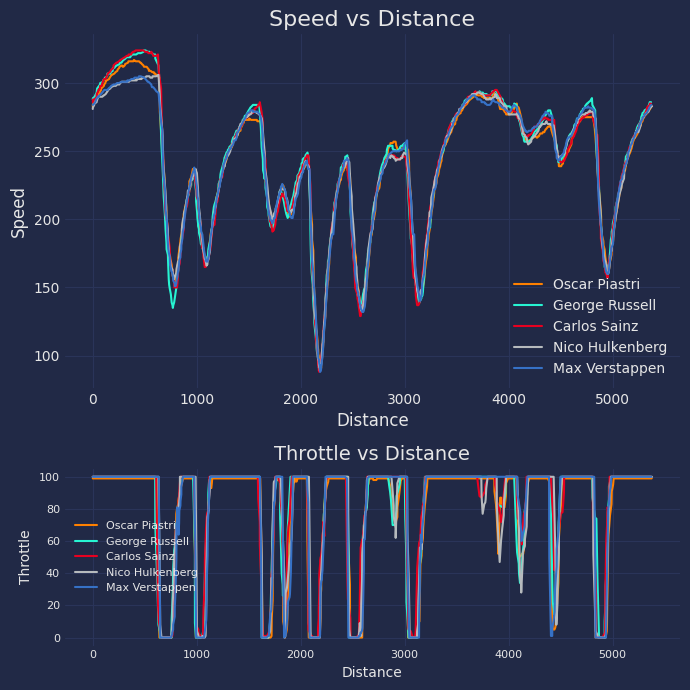

In [32]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = sprint.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_pia_sprint.Distance, tele_pia_sprint.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_sai_sprint.Distance, tele_sai_sprint.Speed, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[0].plot(
    tele_hul_sprint.Distance, tele_hul_sprint.Speed, label="Nico Hulkenberg", color=get_driver_color("HUL")
)
ax[0].plot(
    tele_ver_sprint.Distance, tele_ver_sprint.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_pia_sprint.Distance, tele_pia_sprint.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_sprint.Distance, tele_rus_sprint.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_sai_sprint.Distance, tele_sai_sprint.Throttle, label="Carlos Sainz", color=get_driver_color("SAI")
)
ax[1].plot(
    tele_hul_sprint.Distance, tele_hul_sprint.Throttle, label="Nico Hulkenberg", color=get_driver_color("HUL")
)
ax[1].plot(
    tele_ver_sprint.Distance, tele_ver_sprint.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


*Qualifying*

In [33]:
quali = f1.get_session(2024, "Qatar", "Qualifying")
quali.load()

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'


core           INFO 	Loading data for Qatar Grand Prix - Qualifying [v3.4.4]


req            INFO 	Using cached data for session_info


req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data


req            INFO 	Using cached data for track_status_data


req            INFO 	Using cached data for _extended_timing_data


req            INFO 	Using cached data for timing_app_data


core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data


req            INFO 	Using cached data for position_data


req            INFO 	Using cached data for weather_data


req            INFO 	Using cached data for race_control_messages


core           INFO 	Finished loading data for 20 drivers: ['1', '63', '4', '81', '16', '44', '55', '14', '11', '20', '10', '24', '77', '22', '18', '23', '30', '27', '43', '31']


In [34]:
quali.session_info

{'Meeting': {'Key': 1251,
  'Name': 'Qatar Grand Prix',
  'OfficialName': 'FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2024',
  'Location': 'Lusail',
  'Number': 23,
  'Country': {'Key': 149, 'Code': 'QAT', 'Name': 'Qatar'},
  'Circuit': {'Key': 150, 'ShortName': 'Lusail'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9646,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 11, 30, 21, 0),
 'EndDate': datetime.datetime(2024, 11, 30, 22, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2024/2024-12-01_Qatar_Grand_Prix/2024-11-30_Qualifying/'}

In [35]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,NaN,1.0,NaT,
63,RUS,Mercedes,NaN,2.0,NaT,
4,NOR,McLaren,NaN,3.0,NaT,
81,PIA,McLaren,NaN,4.0,NaT,
16,LEC,Ferrari,NaN,5.0,NaT,
44,HAM,Mercedes,NaN,6.0,NaT,
55,SAI,Ferrari,NaN,7.0,NaT,
14,ALO,Aston Martin,NaN,8.0,NaT,
11,PER,Red Bull Racing,NaN,9.0,NaT,
20,MAG,Haas F1 Team,NaN,10.0,NaT,


In [36]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:45.795000,VER,1,NaT,1.0,1.0,0 days 00:17:10.473000,NaT,NaT,0 days 00:00:33.930000,...,False,Red Bull Racing,0 days 00:17:10.473000,2024-11-30 18:02:27.119,1,NaN,False,,False,False
1,0 days 00:20:07.508000,VER,1,0 days 00:01:21.713000,2.0,1.0,NaT,NaT,0 days 00:00:30.155000,0 days 00:00:27.687000,...,False,Red Bull Racing,0 days 00:18:45.795000,2024-11-30 18:04:02.441,1,NaN,False,,False,True
2,0 days 00:21:45.195000,VER,1,0 days 00:01:37.687000,3.0,1.0,NaT,0 days 00:21:41.142000,0 days 00:00:38.311000,0 days 00:00:29.246000,...,False,Red Bull Racing,0 days 00:20:07.508000,2024-11-30 18:05:24.154,1,NaN,False,,False,False
3,0 days 00:26:40.511000,VER,1,NaT,4.0,2.0,0 days 00:25:07.302000,NaT,NaT,0 days 00:00:31.360000,...,True,Red Bull Racing,0 days 00:21:45.195000,2024-11-30 18:07:01.841,1,NaN,False,,False,False
4,0 days 00:28:17.235000,VER,1,0 days 00:01:36.724000,5.0,2.0,NaT,NaT,0 days 00:00:36.963000,0 days 00:00:31.862000,...,True,Red Bull Racing,0 days 00:26:40.511000,2024-11-30 18:11:57.157,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0 days 00:26:24.356000,OCO,31,0 days 00:01:39.238000,6.0,2.0,NaT,0 days 00:26:20.186000,0 days 00:00:35.261000,0 days 00:00:31.786000,...,True,Alpine,0 days 00:24:45.118000,2024-11-30 18:10:01.764,1,NaN,False,,False,False
370,0 days 00:30:03.063000,OCO,31,NaT,7.0,3.0,0 days 00:28:15.270000,NaT,NaT,0 days 00:00:31.418000,...,True,Alpine,0 days 00:26:24.356000,2024-11-30 18:11:41.002,1,NaN,False,,False,False
371,0 days 00:31:34.085000,OCO,31,0 days 00:01:31.022000,8.0,3.0,NaT,NaT,0 days 00:00:33.599000,0 days 00:00:30.784000,...,True,Alpine,0 days 00:30:03.063000,2024-11-30 18:15:19.709,1,NaN,False,,False,True
372,0 days 00:32:56.799000,OCO,31,0 days 00:01:22.714000,9.0,3.0,NaT,NaT,0 days 00:00:30.537000,0 days 00:00:28.012000,...,True,Alpine,0 days 00:31:34.085000,2024-11-30 18:16:50.731,1,NaN,False,,False,True


In [37]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:20.520000 which was in Lap number 21.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:33.930000,0 days 00:00:26.689000,227.0,280.0,282.0,149.0
1,0 days 00:01:21.713000,0 days 00:00:30.155000,0 days 00:00:27.687000,0 days 00:00:23.871000,252.0,288.0,283.0,323.0
2,0 days 00:01:37.687000,0 days 00:00:38.311000,0 days 00:00:29.246000,0 days 00:00:30.130000,236.0,263.0,NaN,252.0
3,NaT,NaT,0 days 00:00:31.360000,0 days 00:00:29.690000,221.0,262.0,253.0,160.0
4,0 days 00:01:36.724000,0 days 00:00:36.963000,0 days 00:00:31.862000,0 days 00:00:27.899000,236.0,267.0,282.0,294.0


In [38]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,288,7,11448
3,289,7,11474
4,291,7,11526
5,292,7,11593
6,293,7,11660
...,...,...,...
611,282,7,11261
612,284,7,11278
613,285,7,11319
614,286,7,11361


In [39]:
rus_quali_laps = quali.laps.pick_driver("RUS")
fastest_lap_rus_quali = rus_quali_laps.pick_fastest().LapTime
rus_quali_lap_time = rus_quali_laps["LapTime"]
rus_quali_sec1 = rus_quali_laps["Sector1Time"]
rus_quali_sec2 = rus_quali_laps["Sector2Time"]
rus_quali_sec3 = rus_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_quali), "which was in Lap number" ,rus_quali_laps.pick_fastest().LapNumber)
rus_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:20.575000 which was in Lap number 23.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
22,NaT,NaT,0 days 00:00:35.134000,0 days 00:00:35.899000,212.0,263.0,NaN,124.0
23,0 days 00:02:18.236000,0 days 00:01:18.338000,0 days 00:00:31.856000,0 days 00:00:28.042000,227.0,279.0,274.0,74.0
24,0 days 00:01:33.698000,0 days 00:00:34.279000,0 days 00:00:30.946000,0 days 00:00:28.473000,228.0,268.0,284.0,308.0
25,0 days 00:01:21.519000,0 days 00:00:30.041000,0 days 00:00:27.632000,0 days 00:00:23.846000,253.0,288.0,282.0,318.0
26,0 days 00:01:48.527000,0 days 00:00:43.088000,0 days 00:00:33.578000,0 days 00:00:31.861000,222.0,128.0,NaN,115.0


In [40]:
fastest_lap_rus_quali = rus_quali_laps.pick_fastest()
tele_rus_quali = fastest_lap_rus_quali.get_telemetry().add_distance()
speed_rus_quali = tele_rus_quali.Speed
tele_rus_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,290,7,11113
3,291,7,10875
4,293,7,10399
5,295,7,10519
6,297,8,10640
...,...,...,...
616,280,7,11547
617,281,7,11558
618,282,7,11570
619,283,7,11578


In [41]:
nor_quali_laps = quali.laps.pick_driver("NOR")
fastest_lap_nor_quali = nor_quali_laps.pick_fastest().LapTime
nor_quali_lap_time = nor_quali_laps["LapTime"]
nor_quali_sec1 = nor_quali_laps["Sector1Time"]
nor_quali_sec2 = nor_quali_laps["Sector2Time"]
nor_quali_sec3 = nor_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_nor_quali), "which was in Lap number" ,nor_quali_laps.pick_fastest().LapNumber)
nor_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:20.772000 which was in Lap number 21.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
50,NaT,NaT,0 days 00:00:31.293000,0 days 00:00:37.687000,218.0,214.0,275.0,151.0
51,0 days 00:01:22.029000,0 days 00:00:30.244000,0 days 00:00:27.814000,0 days 00:00:23.971000,247.0,287.0,281.0,316.0
52,0 days 00:01:55.388000,0 days 00:00:49.286000,0 days 00:00:32.028000,0 days 00:00:34.074000,198.0,263.0,281.0,205.0
53,0 days 00:01:21.578000,0 days 00:00:30.028000,0 days 00:00:27.728000,0 days 00:00:23.822000,251.0,288.0,281.0,319.0
54,0 days 00:01:41.152000,0 days 00:00:34.162000,0 days 00:00:34.010000,0 days 00:00:32.980000,204.0,274.0,NaN,278.0


In [42]:
fastest_lap_nor_quali = nor_quali_laps.pick_fastest()
tele_nor_quali = fastest_lap_nor_quali.get_telemetry().add_distance()
speed_nor_quali = tele_nor_quali.Speed
tele_nor_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,287,7,11447
3,289,7,11509
4,292,7,11633
5,294,7,11235
6,294,7,10860
...,...,...,...
610,280,7,11217
611,282,7,11304
612,283,7,11357
613,285,7,11411


In [43]:
lec_quali_laps = quali.laps.pick_driver("LEC")
fastest_lap_lec_quali = lec_quali_laps.pick_fastest().LapTime
lec_quali_lap_time = lec_quali_laps["LapTime"]
lec_quali_sec1 = lec_quali_laps["Sector1Time"]
lec_quali_sec2 = lec_quali_laps["Sector2Time"]
lec_quali_sec3 = lec_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_quali), "which was in Lap number" ,lec_quali_laps.pick_fastest().LapNumber)
lec_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:20.852000 which was in Lap number 25.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
94,NaT,NaT,0 days 00:00:31.260000,0 days 00:00:26.500000,222.0,260.0,280.0,92.0
95,0 days 00:01:22.420000,0 days 00:00:30.443000,0 days 00:00:27.884000,0 days 00:00:24.093000,249.0,285.0,280.0,316.0
96,0 days 00:01:51.429000,0 days 00:00:44.813000,0 days 00:00:35.322000,0 days 00:00:31.294000,211.0,262.0,281.0,89.0
97,0 days 00:01:22.275000,0 days 00:00:30.300000,0 days 00:00:27.990000,0 days 00:00:23.985000,253.0,286.0,278.0,322.0
98,0 days 00:01:36.504000,0 days 00:00:33.574000,0 days 00:00:30.727000,0 days 00:00:32.203000,220.0,263.0,NaN,305.0


In [44]:
fastest_lap_lec_quali = lec_quali_laps.pick_fastest()
tele_lec_quali = fastest_lap_lec_quali.get_telemetry().add_distance()
speed_lec_quali = tele_lec_quali.Speed
tele_lec_quali.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.


core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,289,7,11587
3,290,7,11611
4,291,7,11662
5,292,7,11714
6,292,7,11434
...,...,...,...
609,283,7,11416
610,285,7,11498
611,286,7,11522
612,287,7,11546


In [45]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Lando Norris"] * len(nor_quali_sec1),
        "Sector1Time": nor_quali_sec1,
        "Sector2Time": nor_quali_sec2,
        "Sector3Time": nor_quali_sec3,
        "Lap Time": nor_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:30.155000,0 days 00:00:27.687000,0 days 00:00:23.871000,0 days 00:01:21.713000
2,Max Verstappen,0 days 00:00:38.311000,0 days 00:00:29.246000,0 days 00:00:30.130000,0 days 00:01:37.687000
4,Max Verstappen,0 days 00:00:36.963000,0 days 00:00:31.862000,0 days 00:00:27.899000,0 days 00:01:36.724000
5,Max Verstappen,0 days 00:00:29.967000,0 days 00:00:27.798000,0 days 00:00:23.814000,0 days 00:01:21.579000
8,Max Verstappen,0 days 00:00:29.854000,0 days 00:00:27.475000,0 days 00:00:23.756000,0 days 00:01:21.085000
...,...,...,...,...,...
90,Charles Leclerc,0 days 00:00:29.827000,0 days 00:00:27.513000,0 days 00:00:23.660000,0 days 00:01:21
91,Charles Leclerc,0 days 00:00:37.775000,0 days 00:00:33.220000,0 days 00:00:36.687000,0 days 00:01:47.682000
93,Charles Leclerc,0 days 00:00:29.782000,0 days 00:00:27.483000,0 days 00:00:23.620000,0 days 00:01:20.885000
94,Charles Leclerc,0 days 00:00:40.729000,0 days 00:00:30.742000,0 days 00:00:32.709000,0 days 00:01:44.180000


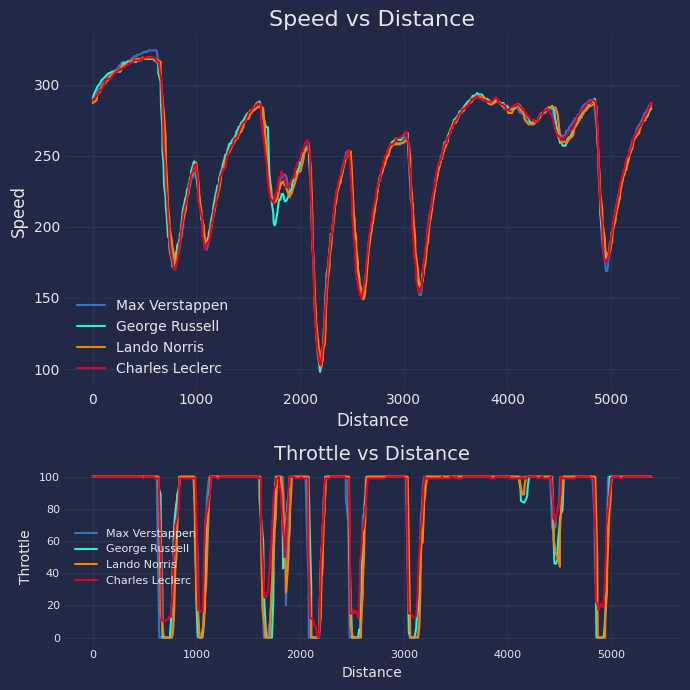

In [46]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_rus_quali.Distance, tele_rus_quali.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_nor_quali.Distance, tele_nor_quali.Speed, label="Lando Norris", color=get_driver_color("NOR")
)
ax[0].plot(
    tele_lec_quali.Distance, tele_lec_quali.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_rus_quali.Distance, tele_rus_quali.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_nor_quali.Distance, tele_nor_quali.Throttle, label="Lando Norris", color=get_driver_color("NOR")
)
ax[1].plot(
    tele_lec_quali.Distance, tele_lec_quali.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


*Race*

In [3]:
race = f1.get_session(2024, "Qatar", "R")
race.load()

req         WARNING 	DEFAULT CACHE ENABLED! (417.41 MB) /home/soham32/.cache/fastf1


events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '10', '55', '14', '24', '20', '4', '77', '44', '22', '30', '23', '27', '11', '18', '

In [48]:
race.session_info

{'Meeting': {'Key': 1251,
  'Name': 'Qatar Grand Prix',
  'OfficialName': 'FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2024',
  'Location': 'Lusail',
  'Number': 23,
  'Country': {'Key': 149, 'Code': 'QAT', 'Name': 'Qatar'},
  'Circuit': {'Key': 150, 'ShortName': 'Lusail'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9655,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2024, 12, 1, 19, 0),
 'EndDate': datetime.datetime(2024, 12, 1, 21, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2024/2024-12-01_Qatar_Grand_Prix/2024-12-01_Race/'}

In [49]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,2.0,1.0,0 days 01:31:05.323000,Finished
16,LEC,Ferrari,5.0,2.0,0 days 00:00:06.031000,Finished
81,PIA,McLaren,4.0,3.0,0 days 00:00:06.819000,Finished
63,RUS,Mercedes,1.0,4.0,0 days 00:00:14.104000,Finished
10,GAS,Alpine,11.0,5.0,0 days 00:00:16.782000,Finished
55,SAI,Ferrari,7.0,6.0,0 days 00:00:17.476000,Finished
14,ALO,Aston Martin,8.0,7.0,0 days 00:00:19.867000,Finished
24,ZHO,Kick Sauber,12.0,8.0,0 days 00:00:25.360000,Finished
20,MAG,Haas F1 Team,10.0,9.0,0 days 00:00:32.177000,Finished
4,NOR,McLaren,3.0,10.0,0 days 00:00:35.762000,Finished


In [8]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:56:41.540000,VER,1,0 days 00:01:51.344000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.908000,...,True,Red Bull Racing,0 days 00:54:49.896000,2024-12-01 16:03:33.084,124,1.0,False,,False,False
1,0 days 00:59:02.797000,VER,1,0 days 00:02:21.257000,2.0,1.0,NaT,NaT,0 days 00:00:55.914000,0 days 00:00:43.653000,...,True,Red Bull Racing,0 days 00:56:41.540000,2024-12-01 16:05:24.728,4,1.0,False,,False,False
2,0 days 01:01:20.187000,VER,1,0 days 00:02:17.390000,3.0,1.0,NaT,NaT,0 days 00:00:51.955000,0 days 00:00:42.864000,...,True,Red Bull Racing,0 days 00:59:02.797000,2024-12-01 16:07:45.985,4,1.0,False,,False,False
3,0 days 01:03:53.279000,VER,1,NaT,4.0,1.0,NaT,NaT,0 days 00:00:48.051000,0 days 00:00:42.711000,...,True,Red Bull Racing,0 days 01:01:20.187000,2024-12-01 16:10:03.375,41,1.0,False,,False,False
4,0 days 01:05:20.003000,VER,1,0 days 00:01:26.724000,5.0,1.0,NaT,NaT,0 days 00:00:32.248000,0 days 00:00:29.054000,...,True,Red Bull Racing,0 days 01:03:53.279000,2024-12-01 16:12:36.467,12,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0 days 02:20:29.169000,PIA,81,0 days 00:01:23.523000,53.0,4.0,NaT,NaT,0 days 00:00:31.087000,0 days 00:00:28.409000,...,False,McLaren,0 days 02:19:05.646000,2024-12-01 17:27:48.834,1,3.0,False,,False,True
939,0 days 02:21:52.539000,PIA,81,0 days 00:01:23.370000,54.0,4.0,NaT,NaT,0 days 00:00:31.143000,0 days 00:00:28.268000,...,False,McLaren,0 days 02:20:29.169000,2024-12-01 17:29:12.357,1,3.0,False,,False,True
940,0 days 02:23:15.808000,PIA,81,0 days 00:01:23.269000,55.0,4.0,NaT,NaT,0 days 00:00:31.165000,0 days 00:00:28.214000,...,False,McLaren,0 days 02:21:52.539000,2024-12-01 17:30:35.727,1,3.0,False,,False,True
941,0 days 02:24:39.121000,PIA,81,0 days 00:01:23.313000,56.0,4.0,NaT,NaT,0 days 00:00:31.161000,0 days 00:00:28.231000,...,False,McLaren,0 days 02:23:15.808000,2024-12-01 17:31:58.996,1,3.0,False,,False,True


In [26]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:22.905000 which was in Lap number 55.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:51.344000,NaT,0 days 00:00:29.908000,0 days 00:00:47.019000,238.0,164.0,178.0,237.0
1,0 days 00:02:21.257000,0 days 00:00:55.914000,0 days 00:00:43.653000,0 days 00:00:41.690000,189.0,208.0,207.0,182.0
2,0 days 00:02:17.390000,0 days 00:00:51.955000,0 days 00:00:42.864000,0 days 00:00:42.571000,193.0,193.0,235.0,206.0
3,NaT,0 days 00:00:48.051000,0 days 00:00:42.711000,0 days 00:01:02.317000,NaN,211.0,274.0,165.0
4,0 days 00:01:26.724000,0 days 00:00:32.248000,0 days 00:00:29.054000,0 days 00:00:25.422000,237.0,282.0,274.0,291.0


In [27]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,282,7,11225
3,283,7,11255
4,284,7,11264
5,285,7,11273
6,286,7,11299
...,...,...,...
613,280,7,11072
614,280,7,11120
615,281,7,11169
616,282,7,11220


In [28]:
lec_race_laps = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race_laps.pick_fastest().LapTime
lec_race_lap_time = lec_race_laps["LapTime"]
lec_race_sec1 = lec_race_laps["Sector1Time"]
lec_race_sec2 = lec_race_laps["Sector2Time"]
lec_race_sec3 = lec_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_race), "which was in Lap number" ,lec_race_laps.pick_fastest().LapNumber)
lec_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:23.242000 which was in Lap number 53.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
210,0 days 00:01:57.439000,NaT,0 days 00:00:38.757000,0 days 00:00:42.509000,226.0,110.0,175.0,248.0
211,0 days 00:02:22.075000,0 days 00:00:54.070000,0 days 00:00:43.798000,0 days 00:00:44.207000,96.0,236.0,216.0,156.0
212,0 days 00:02:17.488000,0 days 00:00:50.121000,0 days 00:00:41.569000,0 days 00:00:45.798000,189.0,235.0,209.0,251.0
213,0 days 00:02:27.558000,0 days 00:00:45.627000,0 days 00:00:42.117000,0 days 00:00:59.814000,194.0,212.0,274.0,NaN
214,0 days 00:01:29.202000,0 days 00:00:33.653000,0 days 00:00:29.814000,0 days 00:00:25.735000,230.0,283.0,274.0,290.0


In [29]:
fastest_lap_lec_race = lec_race_laps.pick_fastest()
tele_lec_race = fastest_lap_lec_race.get_telemetry().add_distance()
speed_lec_race = tele_lec_race.Speed
tele_lec_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,283,7,11322
3,284,7,11341
4,285,7,11380
5,286,7,11430
6,287,7,11463
...,...,...,...
628,278,7,11160
629,279,7,11198
630,279,7,11233
631,280,7,11269


In [30]:
pia_race_laps = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race_laps.pick_fastest().LapTime
pia_race_lap_time = pia_race_laps["LapTime"]
pia_race_sec1 = pia_race_laps["Sector1Time"]
pia_race_sec2 = pia_race_laps["Sector2Time"]
pia_race_sec3 = pia_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_race), "which was in Lap number" ,pia_race_laps.pick_fastest().LapNumber)
pia_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:23.218000 which was in Lap number 51.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
886,0 days 00:01:58.513000,NaT,0 days 00:00:40.081000,0 days 00:00:41.779000,219.0,90.0,156.0,243.0
887,0 days 00:02:22.913000,0 days 00:00:53.604000,0 days 00:00:44.960000,0 days 00:00:44.349000,83.0,246.0,219.0,144.0
888,0 days 00:02:17.707000,0 days 00:00:49.601000,0 days 00:00:41.016000,0 days 00:00:47.090000,180.0,247.0,215.0,279.0
889,0 days 00:02:25.626000,0 days 00:00:45.489000,0 days 00:00:41.218000,0 days 00:00:58.919000,187.0,198.0,279.0,236.0
890,0 days 00:01:27.603000,0 days 00:00:32.822000,0 days 00:00:29.372000,0 days 00:00:25.409000,228.0,284.0,278.0,304.0


In [31]:
fastest_lap_pia_race = pia_race_laps.pick_fastest()
tele_pia_race = fastest_lap_pia_race.get_telemetry().add_distance()
speed_pia_race = tele_pia_race.Speed
tele_pia_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,279,7,11280
3,280,7,11304
4,282,7,11353
5,284,7,11386
6,286,7,11420
...,...,...,...
652,280,7,11187
653,281,7,11243
654,281,7,11290
655,281,7,11338


In [32]:
rus_race_laps = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race_laps.pick_fastest().LapTime
rus_race_lap_time = rus_race_laps["LapTime"]
rus_race_sec1 = rus_race_laps["Sector1Time"]
rus_race_sec2 = rus_race_laps["Sector2Time"]
rus_race_sec3 = rus_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_race), "which was in Lap number" ,rus_race_laps.pick_fastest().LapNumber)
rus_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:23.355000 which was in Lap number 50.0


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
772,0 days 00:01:55.631000,NaT,0 days 00:00:35.146000,0 days 00:00:45.047000,235.0,88.0,187.0,234.0
773,0 days 00:02:21.375000,0 days 00:00:54.918000,0 days 00:00:43.501000,0 days 00:00:42.956000,99.0,194.0,236.0,124.0
774,0 days 00:02:17.726000,0 days 00:00:50.889000,0 days 00:00:42.080000,0 days 00:00:44.757000,203.0,189.0,226.0,104.0
775,0 days 00:02:29.191000,0 days 00:00:46.522000,0 days 00:00:42.581000,0 days 00:01:00.088000,206.0,140.0,278.0,271.0
776,0 days 00:01:27.948000,0 days 00:00:32.967000,0 days 00:00:29.545000,0 days 00:00:25.436000,238.0,283.0,275.0,306.0


In [33]:
fastest_lap_rus_race = rus_race_laps.pick_fastest()
tele_rus_race = fastest_lap_rus_race.get_telemetry().add_distance()
speed_rus_race = tele_rus_race.Speed
tele_rus_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,286,7,10803
3,287,7,10535
4,287,7,10459
5,287,7,10384
6,287,8,10309
...,...,...,...
630,282,7,11572
631,283,7,11606
632,284,7,11640
633,285,7,11391


In [34]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Max Verstappen,0 days 00:00:55.914000,0 days 00:00:43.653000,0 days 00:00:41.690000,0 days 00:02:21.257000
2,Max Verstappen,0 days 00:00:51.955000,0 days 00:00:42.864000,0 days 00:00:42.571000,0 days 00:02:17.390000
4,Max Verstappen,0 days 00:00:32.248000,0 days 00:00:29.054000,0 days 00:00:25.422000,0 days 00:01:26.724000
5,Max Verstappen,0 days 00:00:32.141000,0 days 00:00:29.044000,0 days 00:00:25.317000,0 days 00:01:26.502000
6,Max Verstappen,0 days 00:00:32.062000,0 days 00:00:28.973000,0 days 00:00:25.341000,0 days 00:01:26.376000
...,...,...,...,...,...
223,George Russell,0 days 00:00:31.141000,0 days 00:00:28.435000,0 days 00:00:24.105000,0 days 00:01:23.681000
224,George Russell,0 days 00:00:31.119000,0 days 00:00:28.292000,0 days 00:00:24.149000,0 days 00:01:23.560000
225,George Russell,0 days 00:00:30.987000,0 days 00:00:28.306000,0 days 00:00:24.068000,0 days 00:01:23.361000
226,George Russell,0 days 00:00:30.966000,0 days 00:00:28.328000,0 days 00:00:24.072000,0 days 00:01:23.366000


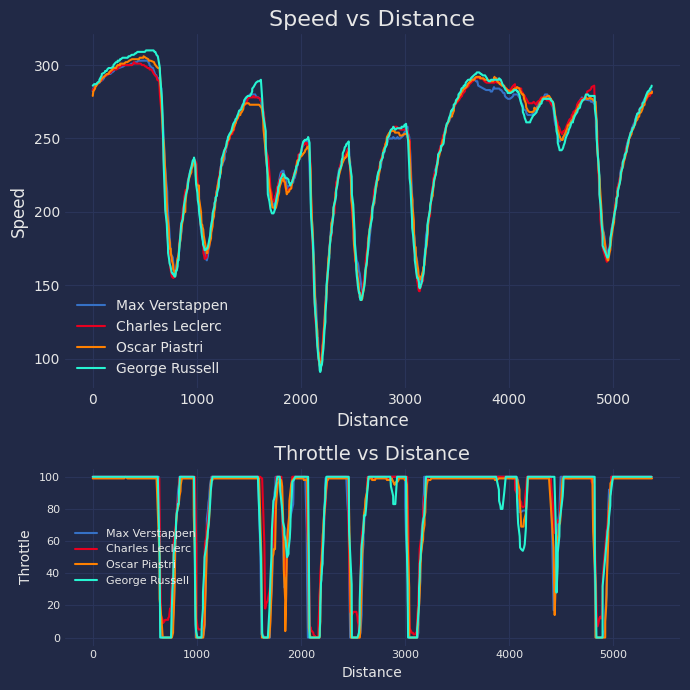

In [35]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_lec_race.Distance, tele_lec_race.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_pia_race.Distance, tele_pia_race.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_race.Distance, tele_rus_race.Speed, label="George Russell", color=get_driver_color("RUS")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_lec_race.Distance, tele_lec_race.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_pia_race.Distance, tele_pia_race.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_race.Distance, tele_rus_race.Throttle, label="George Russell", color=get_driver_color("RUS")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


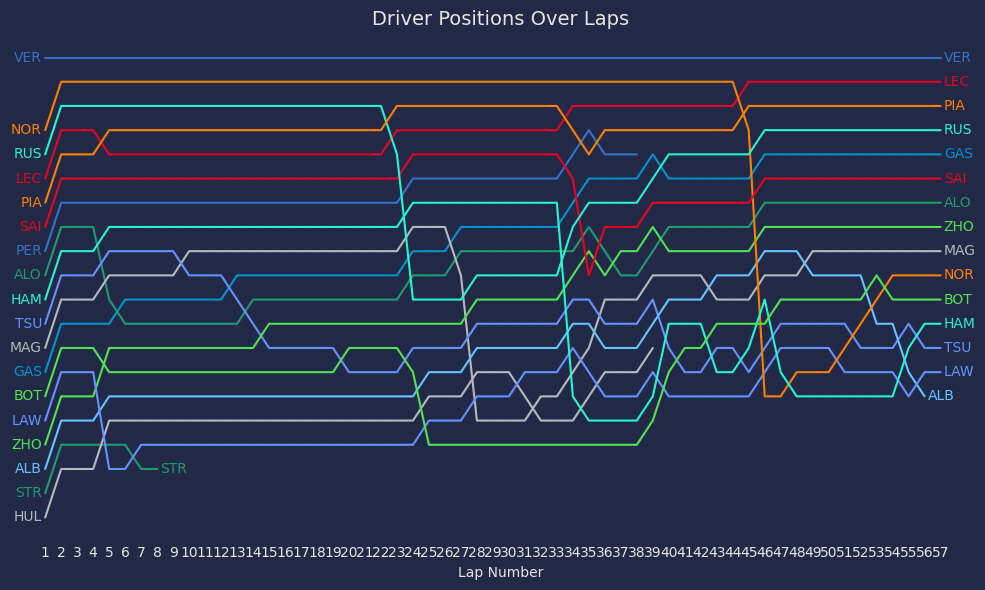

In [36]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instea

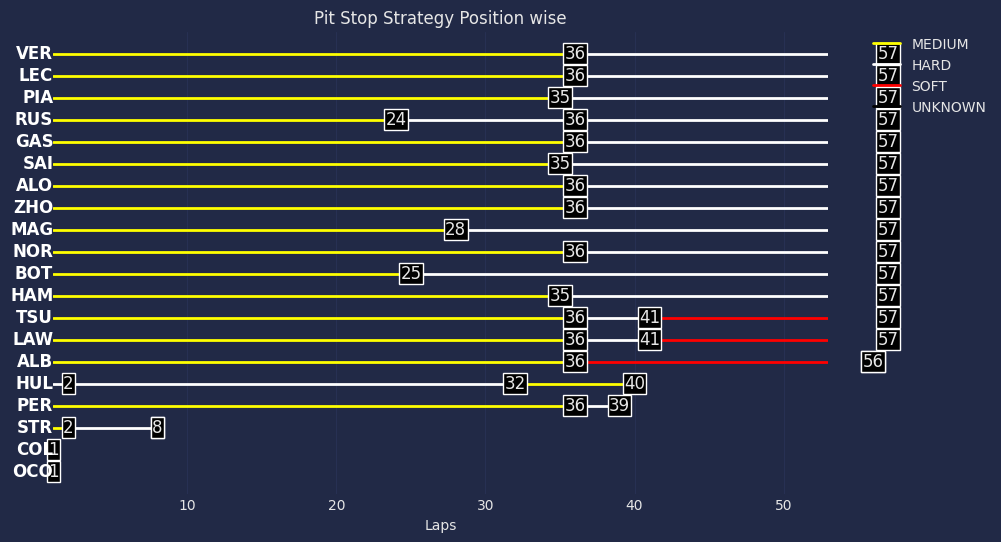

In [37]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [13]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_30380/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
17,STR,300.0
0,VER,308.0
1,LEC,312.0
2,PIA,324.0
14,ALB,324.0
9,NOR,325.0
10,BOT,326.0
12,TSU,327.0
16,PER,327.0
5,SAI,328.0


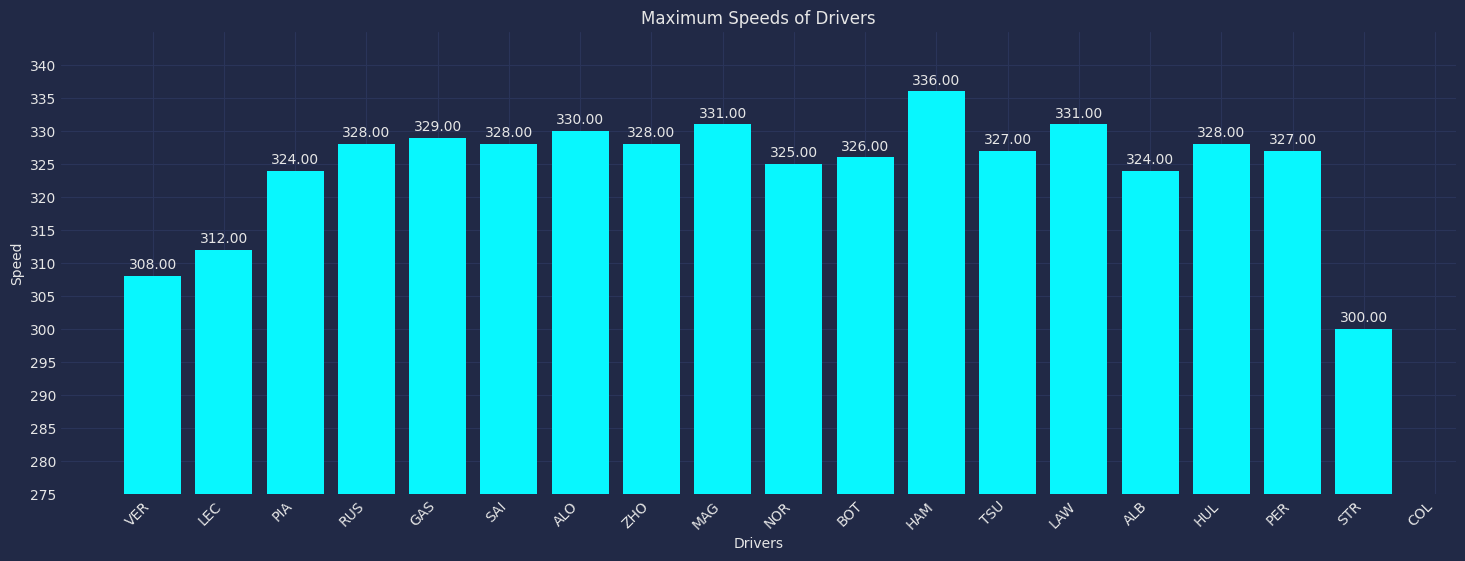

In [14]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [15]:
laps_lec = race_laps.pick_driver("LEC")
laps_ver = race_laps.pick_driver("VER")

fastest_lec = laps_lec.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_lec["Driver"] = "LEC"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_lec,fastest_ver])

/home/soham32/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [18]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [19]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,LEC,290.800000
1,1,VER,290.130435
2,2,LEC,299.714286
3,2,VER,300.583333
4,3,LEC,297.142857
5,3,VER,298.850000
6,4,LEC,185.484848
7,4,VER,196.878788
8,5,LEC,209.379310
9,5,VER,210.068966


In [20]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

In [21]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'LEC', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

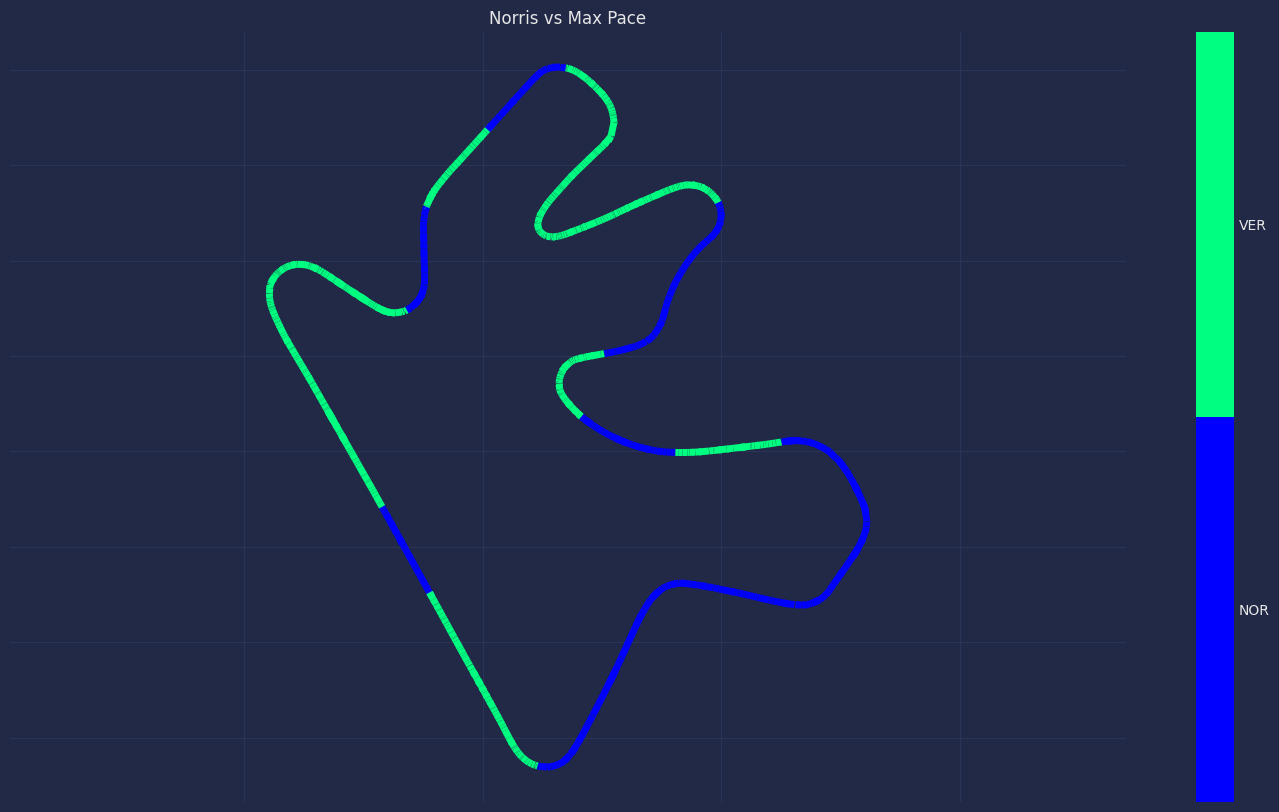

In [22]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['NOR', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
